In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Solo si estás en un Jupyter Notebook
%matplotlib inline
import seaborn as sns

from autogluon.tabular import TabularPredictor

# 1. Carga del Conjunto de Datos:

In [19]:
# import de yprofiler
from ydata_profiling import ProfileReport

In [20]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# 2. Análisis Exploratorio de Datos (EDA):

• Obtenga estadísticas descriptivas básicas del conjunto de datos. <br>
• Visualice la distribución de las variables. <br>
• Verifique la presencia de valores nulos o atípicos y decida cómo manejarlos. <br>

In [21]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [22]:
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


In [23]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

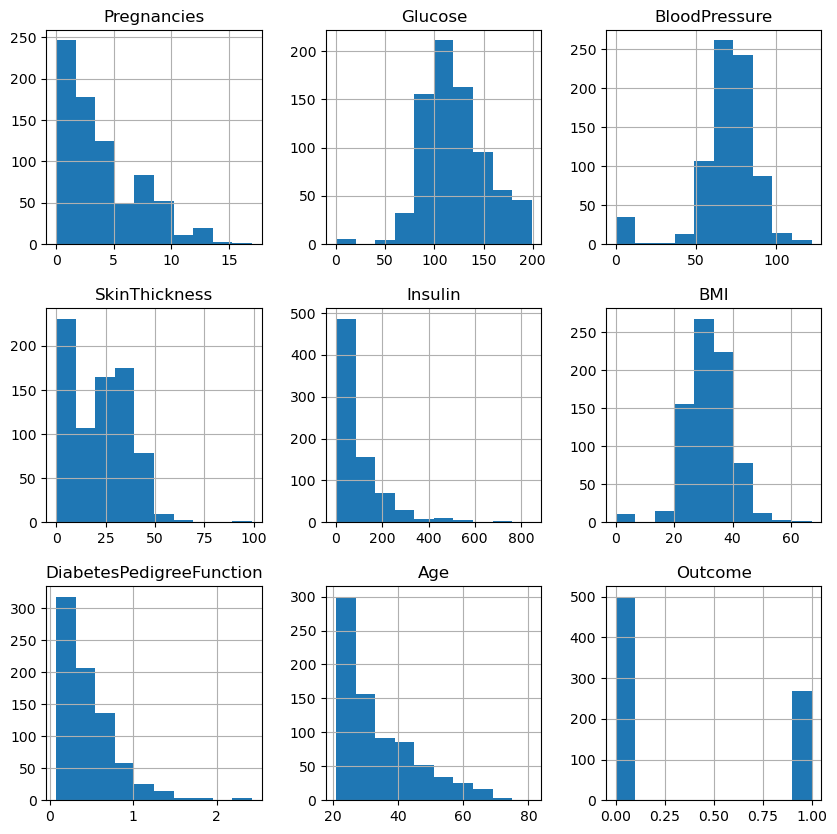

In [24]:
df.hist(figsize=(10, 10))
plt.show()

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Entrenamiento con AutoGluon:
• Utilice la opción `best_quality` del parámetro “preset” y la métrica `accuracy`. <br>
• Entrene varios modelos de clasificación con AutoGluon para predecir la columna "Outcome" <br>

In [27]:
predictor = TabularPredictor(label='Outcome', eval_metric='accuracy').fit(df, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20241006_220728"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          16
Memory Avail:       2.38 GB / 15.63 GB (15.2%)
Disk Space Avail:   136.05 GB / 449.33 GB (30.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

[1000]	valid_set's binary_error: 0.197917


	0.8268	 = Validation score   (accuracy)
	6.92s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 725.02s of the 724.65s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
c:\Users\Alejandro\.conda\envs\ag\lib\site-packages\autogluon\tabular\models\tabular_nn\torch\tabular_nn_torch.py:411: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they 

# 4. Evaluación del Modelo:
• Despliegue una tabla de los mejores modelos en función de la precisión y destaque el mejor modelo. <br>
• Visualice la matriz de confusión del mejor modelo

In [28]:
# Tabla de los mejores modelos
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)

                       model  score_val eval_metric  pred_time_val  \
0            LightGBM_BAG_L2   0.843750    accuracy       6.259458   
1        WeightedEnsemble_L3   0.843750    accuracy       6.260510   
2            CatBoost_BAG_L2   0.842448    accuracy       6.242133   
3       LightGBM_r130_BAG_L2   0.842448    accuracy       6.269311   
4         XGBoost_r89_BAG_L2   0.841146    accuracy       6.233668   
..                       ...        ...         ...            ...   
153  RandomForest_r15_BAG_L1   0.757812    accuracy       0.067193   
154    ExtraTrees_r42_BAG_L1   0.756510    accuracy       0.094032   
155  RandomForestEntr_BAG_L1   0.750000    accuracy       0.065576   
156    KNeighborsUnif_BAG_L1   0.714844    accuracy       0.059690   
157    KNeighborsDist_BAG_L1   0.712240    accuracy       0.034227   

        fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0    1589.178830                0.053281           8.435356            2   
1    15

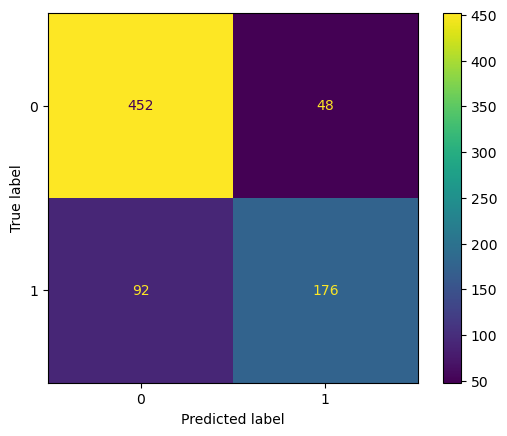

In [29]:
# Matriz de confusión del mejor modelo
y_pred = predictor.predict(df.drop(columns=["Outcome"]))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df["Outcome"], y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()